In [ ]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.9 MB/s eta 0:00:00a 0:00:01


In [ ]:
!pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14933 sha256=daeb03fc4a23fee1315ecf0829b2dd90da8bb358db06f1927e443d5a31e6638e
  Stored in directory: /home/jupyter/.cache/pip/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown


In [ ]:
!gdown --id 1SEN7OU5IoOWO8e7lVayzt8yO9uGhyqWF

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1SEN7OU5IoOWO8e7lVayzt8yO9uGhyqWF
To: /home/jupyter/uk_comm_ptrans_data.sas7bdat
100%|███████████████████████████████████████| 8.59M/8.59M [00:00<00:00, 115MB/s]


In [ ]:
!pip install gaminet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 55.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.6/236.6 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 33.1 MB/s eta 0:00:00


In [ ]:
!pip install xlwt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 6.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pyreadstat
import re
import os

import tensorflow as tf
import json
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, roc_auc_score

from gaminet import GAMINet
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization

In [ ]:
df, meta = pyreadstat.read_sas7bdat('uk_comm_ptrans_data.sas7bdat')
print(df.values.shape)

(20980, 83)


In [ ]:
cols = meta.column_names
# temp_df = (df.mean() >= 1)
# print(temp_df.values.shape)
date_cols = [i for i in cols if "date" in i]
print(date_cols)
# print(df[date_cols].value_counts())
# print(*cols, sep="\n")

['applic_date', 'purchase_date', 'date_into_lru']


In [ ]:
def cat_or_num(col):
    if(df["odefind_new"].value_counts().shape[0] == 2):
        return {"type":"categorical"}
    else:
        return {"type":"continuous"}

meta_info = {}
col_odefind1 = None
for col in sorted(cols):
    if(col != "odefind1" and col not in date_cols):
        meta_info[col] = cat_or_num(col)
    else:
        try:
            req = df.pop(col)
            if(col == "odefind1"):
                df["odefind1"] = req
        except Exception:
            print("Already popped")
meta_info["odefind1"] = {"type":"target"}
print(meta_info)
print(len(meta_info))

{'acidtest_1': {'type': 'categorical'}, 'advance_pct': {'type': 'categorical'}, 'avgterm': {'type': 'categorical'}, 'balloon_amt': {'type': 'categorical'}, 'balloon_ind': {'type': 'categorical'}, 'business': {'type': 'categorical'}, 'capitalemployed_1': {'type': 'categorical'}, 'ccjtoshftotl24m_1': {'type': 'categorical'}, 'compage_1': {'type': 'categorical'}, 'compavgdbt_12mth_1': {'type': 'categorical'}, 'compavgdbt_3mth_1': {'type': 'categorical'}, 'compavgdbt_6mth_1': {'type': 'categorical'}, 'compdbt_1': {'type': 'categorical'}, 'compnumdbt_100000_1': {'type': 'categorical'}, 'compnumdbt_10000_1': {'type': 'categorical'}, 'compunpaccs_1': {'type': 'categorical'}, 'country': {'type': 'categorical'}, 'creditlimit_1': {'type': 'categorical'}, 'currentliabilitiestotal_1': {'type': 'categorical'}, 'curtoprevdirlst12mth_1': {'type': 'categorical'}, 'dl12_regnumber_1': {'type': 'categorical'}, 'dl41_supppaypattn_1': {'type': 'categorical'}, 'dl77_creditrating_1': {'type': 'categorical'},

In [ ]:
nan_cols = pd.DataFrame(df.isna().sum())
nan100_cols = pd.DataFrame(df.isna().sum()*100/df.values.shape[0])
print(nan100_cols)
nan_df = pd.concat([nan_cols, nan100_cols], axis=1, join='inner')
print(nan_df)
nan_df.to_excel("information.xls", sheet_name="Nan_Columns")

                                0
scope_refno              0.000000
advance_pct              0.000000
balloon_amt              0.000000
final_term               0.000000
time_in_business         0.000000
...                           ...
percapptslst12mth_1      0.934223
numccls_1                0.934223
compunpaccs_1           28.517636
numunpaidacctslstmth_1   3.112488
odefind1                 0.000000

[80 rows x 1 columns]
                           0          0
scope_refno                0   0.000000
advance_pct                0   0.000000
balloon_amt                0   0.000000
final_term                 0   0.000000
time_in_business           0   0.000000
...                      ...        ...
percapptslst12mth_1      196   0.934223
numccls_1                196   0.934223
compunpaccs_1           5983  28.517636
numunpaidacctslstmth_1   653   3.112488
odefind1                   0   0.000000

[80 rows x 2 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  


### Imputing and Removing specified colums:
1. Remove ```compnumdbt_100000_1``` and ```scope_refno```
1. Imputing remaining

In [ ]:
remove_cols = ["compnumdbt_10000_1", "scope_refno"]
try:
    for i in remove_cols:
        meta_info.pop(i)
        df.pop(i)
except Exception:
    print("Already popped")
print(df.values.shape, len(meta_info))

(20980, 78) 78


In [ ]:
# Imputed!!
for i, (key, value) in enumerate(meta_info.items()):
    if(value["type"] == "categorical"):
        df[key].fillna(df[key].mode()[0], inplace=True)
    else:
        df[key].fillna(df[key].mean(), inplace=True)


In [ ]:
x, y = df.iloc[:,:-1].values, df.iloc[:,[-1]].values

print(x.shape, y.shape)

xx = np.zeros((x.shape[0], x.shape[1]), dtype=np.float32)
for i, (key, item) in enumerate(meta_info.items()):
    if item['type'] == 'target':
        sy = MinMaxScaler((0,1))
        y = sy.fit_transform(y)
        meta_info[key]['scaler'] = sy
    elif item['type'] == 'categorical':
        enc = OrdinalEncoder()
        xx[:,[i]] = enc.fit_transform(x[:,[i]])
        meta_info[key]['values'] = []
        for item in enc.categories_[0].tolist():
            try:
                if item == int(item):
                    meta_info[key]['values'].append(str(int(item)))
                else:
                    meta_info[key]['values'].append(str(item))
            except ValueError:
                meta_info[key]['values'].append(str(item))
    else:
        sx = MinMaxScaler((0, 1))
        xx[:,[i]] = sx.fit_transform(x[:,[i]])
        meta_info[key]['scaler'] = sx

task_type = 'Regression'
train_x, test_x, train_y, test_y = train_test_split(xx.astype(np.float32), y, test_size=0.3, random_state=0)
print(train_x.shape, train_y.shape)

(20980, 77) (20980, 1)
(14686, 77) (14686, 1)


In [ ]:
def metric_wrapper(metric, scaler):
    def wrapper(label, pred):
        return metric(label, pred, scaler=scaler)
    return wrapper

def ras(label, pred, scaler=None):
    return r2_score(label, pred)

get_metric = metric_wrapper(ras, None)

=================================================

In [ ]:
model = GAMINet(meta_info=meta_info, interact_num=30, 
                interact_arch=[100] * 5, subnet_arch=[100] * 5, 
                batch_size=100, task_type=task_type, activation_func=tf.nn.relu,
                main_effect_epochs=50, interaction_epochs=50, tuning_epochs=100, 
                lr_bp=[0.0001, 0.0001, 0.0001], early_stop_thres=[50, 50, 50],
                heredity=True, loss_threshold=0.01, reg_clarity=0.1,
                mono_increasing_list=[], mono_decreasing_list=[], ## the indices list of features
                verbose=True, val_ratio=0.2, random_state=0)

model.fit(train_x, train_y)

2022-10-04 09:11:57.508969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2022-10-04 09:11:57.509026: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-04 09:11:57.509064: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (test-nb): /proc/driver/nvidia/version does not exist
2022-10-04 09:11:57.509633: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.83294, val loss: 0.83374
Main effects training epoch: 2, train loss: 0.63930, val loss: 0.64160
Main effects training epoch: 3, train loss: 0.44071, val loss: 0.44436
Main effects training epoch: 4, train loss: 0.26767, val loss: 0.27210
Main effects training epoch: 5, train loss: 0.14074, val loss: 0.14519
Main effects training epoch: 6, train loss: 0.06393, val loss: 0.06773
Main effects training epoch: 7, train loss: 0.02636, val loss: 0.02923
Main effects training epoch: 8, train loss: 0.01178, val loss: 0.01379
Main effects training epoch: 9, train loss: 0.00712, val loss: 0.00854
Main effects training epoch: 10, train loss: 0.00572, val loss: 0.00681
Main effects training epoch: 11, train loss: 0.00518, val loss: 0.00611
Main effects training epoch: 12, train loss: 0.00486, val loss: 0.00573
Main effects training e

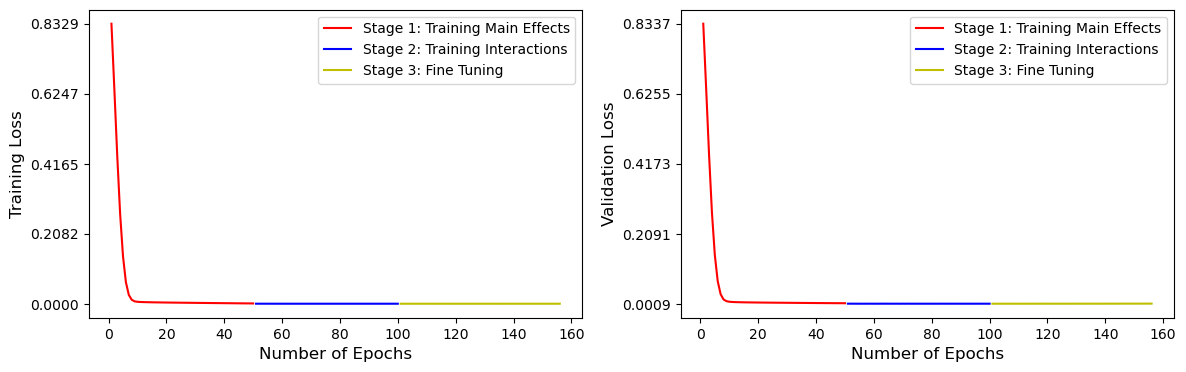

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


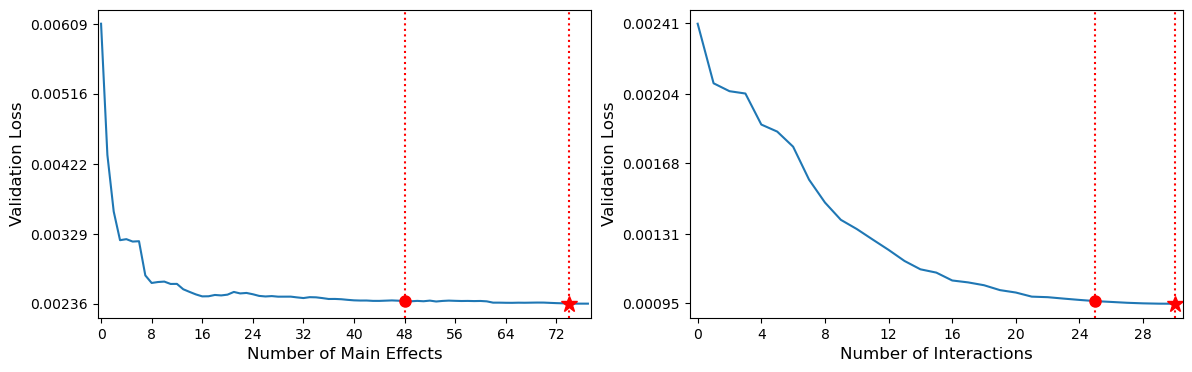

In [ ]:
folder = "./imgs/"
if not os.path.exists(folder):
    os.makedirs(folder)
data_dict_logs = model.summary_logs(save_dict=False)
plot_trajectory(data_dict_logs, folder=folder, name="DATASET_TRAJ", save_png=True, save_eps=True, log_scale=False)
plot_regularization(data_dict_logs, folder=folder, name="DATASET_REGU", save_png=True, save_eps=True, log_scale=False)

In [ ]:
data_dict_global = model.global_explain(save_dict=True, folder=folder, name="gaminet_global")
global_visualize_density(data_dict_global, folder=folder, name="gaminet_global", main_effect_num=100, interaction_num=100, cols_per_row=1, save_png=True, save_eps=False)

In [ ]:
feature_importance_visualize(data_dict_global)
data_dict_local = model.local_explain(test_x[[0]], test_y[[0]], save_dict=False)
local_visualize(data_dict_local[0], save_png=False)

In [ ]:
model.save(folder="./", name="mod01")

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)
print(r2_score(test_y, pred_test))
print(r2_score(train_y, pred_train))

0.8143507453400057
0.9580683107818195
